In [1]:
# Socio-Clinical Depression Assessment System — Data Cleaning & Preparation

import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

print("✅ Libraries loaded successfully!")


✅ Libraries loaded successfully!


In [2]:
BASE_DIR = os.path.abspath("..")
DATA_RAW = os.path.join(BASE_DIR, "data", "raw")
DATA_PROCESSED = os.path.join(BASE_DIR, "data", "processed")

os.makedirs(DATA_PROCESSED, exist_ok=True)

dataset_path = os.path.join(DATA_RAW, "mhp_dataset.csv")
df = pd.read_csv(dataset_path)

print(f"✅ Dataset loaded successfully! Shape: {df.shape}")
df.head()


✅ Dataset loaded successfully! Shape: (2028, 39)


,Age,Gender,University,Department,Academic_Year,Current_CGPA,waiver_or_scholarship,PSS1,PSS2,PSS3,...,PHQ2,PHQ3,PHQ4,PHQ5,PHQ6,PHQ7,PHQ8,PHQ9,Depression Value,Depression Label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Second Year or Equivalent,2.50 - 2.99,No,3,4,3,...,2,3,2,2,2,2,3,2,20,Severe Depression
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,3,3,4,...,2,2,2,2,2,2,2,2,19,Moderately Severe Depression
2,18-22,Male,American International University Bangladesh (...,Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,0,0,0,...,0,0,0,0,0,0,0,0,0,No Depression
3,18-22,Male,American International University Bangladesh (...,Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,3,1,2,...,1,2,1,2,1,2,2,1,14,Moderate Depression
4,18-22,Male,North South University (NSU),Engineering - CS / CSE / CSC / Similar to CS,Second Year or Equivalent,2.50 - 2.99,No,4,4,4,...,3,3,3,1,3,0,3,3,20,Severe Depression


In [3]:
# Clean column names: remove spaces, dots, special chars
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace(r'[^A-Za-z0-9_]+', '', regex=True)

print("✅ Column names cleaned!")
print(df.columns.tolist())


✅ Column names cleaned!
['Age', 'Gender', 'University', 'Department', 'Academic_Year', 'Current_CGPA', 'waiver_or_scholarship', 'PSS1', 'PSS2', 'PSS3', 'PSS4', 'PSS5', 'PSS6', 'PSS7', 'PSS8', 'PSS9', 'PSS10', 'Stress_Value', 'Stress_Label', 'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'Anxiety_Value', 'Anxiety_Label', 'PHQ1', 'PHQ2', 'PHQ3', 'PHQ4', 'PHQ5', 'PHQ6', 'PHQ7', 'PHQ8', 'PHQ9', 'Depression_Value', 'Depression_Label']


In [4]:
print("\n--- Data Types ---")
print(df.dtypes)

print("\n--- Missing Values ---")
print(df.isnull().sum().sort_values(ascending=False).head(10))



--- Data Types ---
Age                      object
Gender                   object
University               object
Department               object
Academic_Year            object
Current_CGPA             object
waiver_or_scholarship    object
PSS1                      int64
PSS2                      int64
PSS3                      int64
PSS4                      int64
PSS5                      int64
PSS6                      int64
PSS7                      int64
PSS8                      int64
PSS9                      int64
PSS10                     int64
Stress_Value              int64
Stress_Label             object
GAD1                      int64
GAD2                      int64
GAD3                      int64
GAD4                      int64
GAD5                      int64
GAD6                      int64
GAD7                      int64
Anxiety_Value             int64
Anxiety_Label            object
PHQ1                      int64
PHQ2                      int64
PHQ3                

In [5]:
# Select likely categorical columns (you can adjust later)
categorical_cols = ['Gender', 'University', 'Department', 'Academic_Year', 'waiver_or_scholarship']

# Check which ones exist
categorical_cols = [col for col in categorical_cols if col in df.columns]

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

print("✅ Encoded categorical columns:")
print(categorical_cols)


✅ Encoded categorical columns:
['Gender', 'University', 'Department', 'Academic_Year', 'waiver_or_scholarship']


In [6]:
# Define the target variable (Depression Label)
target_col = 'Depression_Label'

# Check if target exists
if target_col not in df.columns:
    raise ValueError("❌ Target column 'Depression_Label' not found. Check your column names!")

# Encode target labels (Normal/Moderate/Severe → 0/1/2)
df[target_col] = le.fit_transform(df[target_col])

# Separate features and target
X = df.drop(columns=[target_col])
y = df[target_col]

print(f"✅ Features and target separated! X shape: {X.shape}, y shape: {y.shape}")


✅ Features and target separated! X shape: (2028, 38), y shape: (2028,)


In [7]:
cleaned_path = os.path.join(DATA_PROCESSED, "mhp_cleaned.csv")
df.to_csv(cleaned_path, index=False)

print(f"✅ Cleaned dataset saved to: {cleaned_path}")


✅ Cleaned dataset saved to: d:\Study\CSE299\Depression Assessment System\data\processed\mhp_cleaned.csv


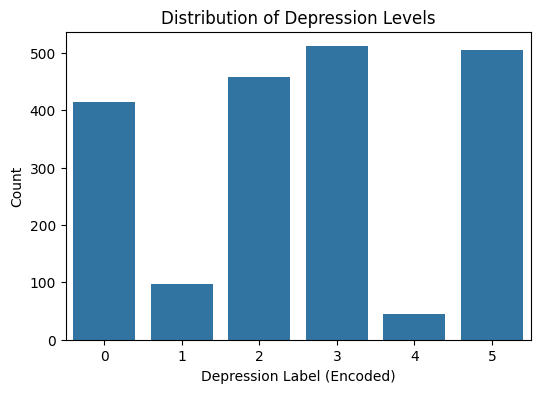

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Distribution of Depression Levels")
plt.xlabel("Depression Label (Encoded)")
plt.ylabel("Count")
plt.show()
